
## NBA project

Here you will find a little project about data analysis. Particularly, this project contains data manipulation, data visualization, OLS, Logit and MEM (Mixed Effects Models). I´m using an `nba` database which contains 5313 players from 1947-2025. You can find more details about this dataset [here](https://www.kaggle.com/datasets/flynn28/v2-nba-player-database/data).

I will be working with this variables:

`Name`: Players name

`Position`: Players position(s)

`Height`: Height of player (inches)

`Weight`: Weight of player (lbs)

`School`: School(s) player attended

`Active`: If player is currently playing (True or False)

`G`: amount of games played by player

`PTS`: average points scored by player per game

`TRB`: average rebounds by player per game

`AST`: average assists per game

## Research exercise

For this project, I will be analyzing the relationship between being a Center (here I will include those who can play two positions, for example Forward-Center or Center-Forward ) and scoring performance. Also, some predictors will be included, such as Games played, Height, Weight, average total asists per game (AST), average total rebounds per game (TRB).

## Data and libraries

So, let's get into the data! We will be working with the following libraries. Then we load our NBA data.

In [3]:

library(dplyr)
library(ggplot2)
library(scales)
library(lme4)
library(misty)
library(texreg)
library(ggrepel)
library(tidyr)
library(lattice)
library(gridExtra)
library(ggthemes)

nba<- read.csv("D:/RSTUDIOWD/papers/nba-proyect/NBA_PLAYERS.csv")


## Variable processing in R

First, we clear our NA cases


In [4]:
nba<- nba %>% 
  na.omit()

Now, let's take a look at the variables in the dataset

In [5]:
colnames(nba)

[1] "Name"     "Debut"    "Final"    "Position" "Height"   "Weight"  
 [7] "Birthday" "School"   "HOF"      "Active"   "G"        "PTS"     
[13] "TRB"      "AST"      "FG."      "FG3."     "FT."      "eFG."    
[19] "PER"      "WS"

For the Schools, we display the 10 schools with most cases

In [6]:
colnames(nba)
nba %>% 
count(School, sort = T) %>% 
  head(10)

[1] "Name"     "Debut"    "Final"    "Position" "Height"   "Weight"  
 [7] "Birthday" "School"   "HOF"      "Active"   "G"        "PTS"     
[13] "TRB"      "AST"      "FG."      "FG3."     "FT."      "eFG."    
[19] "PER"      "WS"

,School,n
,<chr>,<int>
1,,327
2,['Kentucky'],89
3,['Duke'],77
4,['UCLA'],75
5,['UNC'],74
6,['Kansas'],57
7,['Michigan'],48
8,['Arizona'],47
9,['Indiana'],41


Here we observe that the variable with most cases is not labeled, but is not a missed value either. This means that these players did not come from any School. We label this situation as \`street\`.

In [7]:
nba <- nba %>%
  mutate(School = ifelse(School == "" | is.na(School), "street", School))

For \`Height\` and \`Weight\` variables, we transform them to a real metric system :D

In [8]:
nba<- nba %>% 
  mutate(
    Height_cm = Height * 2.54,
    Weight_kg = Weight * 0.453592,
    total_pts_carrer = PTS * G
    )

nba %>% 
  summarise(
    mean_pts = mean(PTS),
    max_pts = max(PTS),
    sd_pts = sd(PTS),
    avg_height = mean(Height_cm),
    avg_weight = mean(Weight_kg)
  )

mean_pts,max_pts,sd_pts,avg_height,avg_weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.257452,30.1,4.827874,198.7787,95.68334


For \`Position\` variable, we display its values and then filter the variable to include only those cases in which players are listed as Center, Forward-Center or Center-Forward.

In [9]:
nba %>% 
  count(Position)

nba %>% 
  filter(Position %in% c("['Center', 'Forward']", "['Center']", "['Forward', 'Center']")) %>% 
  group_by(Position) %>% 
  summarise(AVG_PTS = mean(PTS))

Position,n
<chr>,<int>
"['Center', 'Forward']",144
['Center'],282
"['Forward', 'Center']",293
"['Forward', 'Guard']",136
['Forward'],988
"['Guard', 'Forward']",298
['Guard'],1422


Position,AVG_PTS
<chr>,<dbl>
"['Center', 'Forward']",8.949306
['Center'],6.687943
"['Forward', 'Center']",8.673720


Now we can explore our Centers

In [10]:
nba %>% 
  filter(Position %in% c("['Center', 'Forward']", "['Center']", "['Forward', 'Center']"),
         Active == "True") %>%  
  group_by(Position) %>% 
  slice_max(order_by = PTS, n = 10) %>% 
  select(Position, Name, PTS, Active, Height_cm, Weight_kg) %>% 
  arrange(Position, desc(PTS))


Position,Name,PTS,Active,Height_cm,Weight_kg
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
"['Center', 'Forward']",Karl-Anthony Towns,23.1,True,213.36,112.49082
"['Center', 'Forward']",Victor Wembanyama,22.5,True,220.98,106.59412
"['Center', 'Forward']",Nikola Jokić,21.8,True,210.82,128.82013
"['Center', 'Forward']",Domantas Sabonis,16.1,True,208.28,108.86208
"['Center', 'Forward']",Alperen Şengün,16.0,True,210.82,106.59412
"['Center', 'Forward']",Bam Adebayo,15.7,True,205.74,115.66596
"['Center', 'Forward']",Myles Turner,14.1,True,210.82,113.39800
"['Center', 'Forward']",Al Horford,12.9,True,205.74,108.86208
"['Center', 'Forward']",Jarrett Allen,12.8,True,210.82,110.22286


Top 3 Centers

In [11]:
nba %>% 
  filter(Position %in% c("['Center', 'Forward']", "['Center']", "['Forward', 'Center']"),
         Active == "True") %>%  
  group_by(Position) %>% 
  slice_max(order_by = PTS, n = 3) %>% 
  select(Position, Name, PTS, Active, Height_cm, Weight_kg, G,total_pts_carrer) %>% 
  arrange(Position, desc(PTS))

Position,Name,PTS,Active,Height_cm,Weight_kg,G,total_pts_carrer
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>
"['Center', 'Forward']",Karl-Anthony Towns,23.1,True,213.36,112.4908,645,14899.5
"['Center', 'Forward']",Victor Wembanyama,22.5,True,220.98,106.5941,117,2632.5
"['Center', 'Forward']",Nikola Jokić,21.8,True,210.82,128.8201,745,16241.0
['Center'],Joel Embiid,27.7,True,213.36,127.0058,452,12520.4
['Center'],Nikola Vučević,17.2,True,208.28,117.9339,972,16718.4
['Center'],Deandre Ayton,16.4,True,213.36,113.3980,398,6527.2
"['Forward', 'Center']",Zion Williamson,24.7,True,198.12,128.8201,214,5285.8
"['Forward', 'Center']",Anthony Davis,24.1,True,208.28,114.7588,787,18966.7
"['Forward', 'Center']",Kristaps Porziņģis,19.6,True,218.44,108.8621,501,9819.6


Before we jump into the inference analysis, we need to do some changes first:

-   Rename the variable \`G\` to \`games\`

-   Create a new variable called \`PTSCENTER\`, which contains the average points scored by active Centers in 2025

-   Change the reference category for Position variable to "\['Center'\]"

In [12]:
nba<- nba %>% 
  mutate(
    games = G,
    PTSCENTER = case_when(
      Position %in% c("['Center', 'Forward']", "['Center']", "['Forward', 'Center']") & Active == "True" ~ PTS
    )
  )

We create a new dataset for active Centers

In [13]:
nba_centers <- nba %>%
  filter(!is.na(PTSCENTER))

## Inference Analysis

For this part of the exercise, we estimate a linear regression model (OLS), which says as follows:

$$
AvgPointsScored_i = \beta_0 + \beta_1  Position_i + \beta_2Games_i + \beta_3Height_{cm_i} + \beta_4 Weight_{cm_i} + \\ \beta_5AvgAsist_i +  \beta_6AvgRebounds_i + \varepsilon_i
$$

We estimate model 1 and its fitted values

In [14]:
m1<- lm(PTSCENTER ~ Position + games +Height_cm + Weight_kg + AST + TRB, data = nba_centers )
screenreg(m1)

nba_centers$fittedvalues <- predict(m1)

=========================================
                               Model 1   
-----------------------------------------
(Intercept)                    -23.49    
                               (12.30)   
Position['Center']               0.10    
                                (0.72)   
Position['Forward', 'Center']    2.01 ** 
                                (0.68)   
games                            0.00    
                                (0.00)   
Height_cm                        0.10    
                                (0.06)   
Weight_kg                        0.01    
                                (0.03)   
AST                              2.44 ***
                                (0.31)   
TRB                              0.93 ***
                                (0.13)   
-----------------------------------------
R^2                              0.79    
Adj. R^2                         0.78    
Num. obs.                      119       
=========================================
*** p < 0.001; ** p < 0.01; * p < 0.05

After that, we obtain the 10 highest fitted values and then we generate the plot

In [15]:
nba_centers %>% 
  select(Name, PTS, fittedvalues, Position) %>% 
  slice_max(order_by = fittedvalues, n = 10) 


Name,PTS,fittedvalues,Position
<chr>,<dbl>,<dbl>,<chr>
Nikola Jokić,21.8,27.67629,"['Center', 'Forward']"
Domantas Sabonis,16.1,21.36599,"['Center', 'Forward']"
Victor Wembanyama,22.5,19.74089,"['Center', 'Forward']"
Joel Embiid,27.7,19.38460,['Center']
Julius Randle,19.0,19.01301,"['Forward', 'Center']"
Karl-Anthony Towns,23.1,18.13937,"['Center', 'Forward']"
Anthony Davis,24.1,17.89131,"['Forward', 'Center']"
Alperen Şengün,16.0,17.47692,"['Center', 'Forward']"
Zion Williamson,24.7,16.95292,"['Forward', 'Center']"


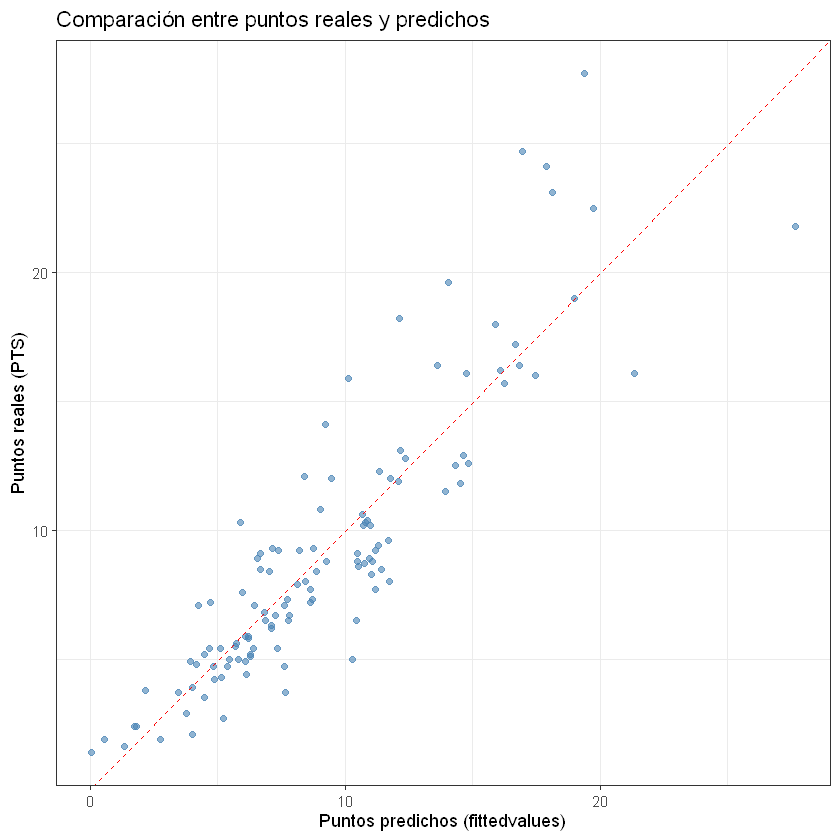

In [16]:
nba_centers %>%
  ggplot(aes(x = fittedvalues, y = PTS)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Comparación entre puntos reales y predichos",
    x = "Puntos predichos (fittedvalues)",
    y = "Puntos reales (PTS)"
  ) +
  theme_bw()

## Logit Model

For this part, we estimate a logit model. First things first, we obtain the average rebounds from the entire sample. Then we get the max and min rebounds values.

In [17]:
nba_centers %>% 
  summarise(
    avg_rb = mean(TRB),
    max = max(TRB),
    min = min(TRB)
  )

avg_rb,max,min
<dbl>,<dbl>,<dbl>
5.872269,12.1,0.4


In the following step, we create a new variable called \`rb_dummy\` in which returns 1 if the player have an average of 6 or greater rebounds per game, and 0 if the total rebounds are less than 6.

In [18]:
nba_centers <- nba_centers %>% 
  mutate(
    rb_dummy = case_when(
      TRB >= 6 ~ 1,
      TRB < 6 ~ 0
    )
  )

We estimate the logit model

In [19]:
m2<- glm(rb_dummy ~  PTSCENTER + Position + games +Height_cm + Weight_kg + AST, data = nba_centers,
         family = binomial (link = "logit") )
screenreg(m2)

=========================================
                               Model 1   
-----------------------------------------
(Intercept)                    -11.11    
                               (18.94)   
PTSCENTER                        0.69 ***
                                (0.19)   
Position['Center']               1.65    
                                (1.04)   
Position['Forward', 'Center']    0.00    
                                (1.03)   
games                           -0.00    
                                (0.00)   
Height_cm                       -0.03    
                                (0.10)   
Weight_kg                        0.08    
                                (0.05)   
AST                              2.12 *  
                                (0.87)   
-----------------------------------------
AIC                             75.73    
BIC                             97.97    
Log Likelihood                 -29.87    
Deviance                        59.73    
Num. obs.                      119       
=========================================
*** p < 0.001; ** p < 0.01; * p < 0.05

INTERPRETAR

## Multilevel model (MEM)

Finally, we estimate a multilevel model. In this part, we expand the sample to include all positions and players in the data base whether actives or not. Lastly, for the level-2 variables, we select the top 5 schools with the highest players in order to simplify the exercise.

In [20]:
nba<- nba %>% 
  mutate(
    CENTERS = Position %in% c("['Center', 'Forward']", "['Center']", "['Forward', 'Center']")
    )
  
top5_schools <- nba %>%
  count(School, sort = TRUE) %>%
  slice_max(n, n = 5) %>%
  pull(School)
  
 

nba_top5_schools <- nba %>% 
  filter(School %in% top5_schools) 

nba_top5_schools %>% 
  count(School, sort = T)

School,n
<chr>,<int>
street,327
['Kentucky'],89
['Duke'],77
['UCLA'],75
['UNC'],74


## Centering

Our interest is to


In [21]:
nba_top5_schools$games_cgm <- center(nba_top5_schools$games, type = "CGM")
nba_top5_schools$Height_cm_cgm <- center(nba_top5_schools$Height_cm, type = "CGM")
nba_top5_schools$Weight_kg_cgm <- center(nba_top5_schools$Weight_kg, type = "CGM")
nba_top5_schools$AST_cgm <- center(nba_top5_schools$AST, type = "CGM")
nba_top5_schools$TRB_cgm <- center(nba_top5_schools$TRB, type = "CGM")

We estimate three models. First, the

In [22]:
mnulo<- lmer(PTS ~ 1 + (1|School), data = nba_top5_schools)

m3<- lmer(PTS ~ Position + games_cgm + Height_cm_cgm + Weight_kg_cgm + AST_cgm + TRB_cgm + (1|School)  , data = nba_top5_schools)


m4<- lmer(PTS ~ Position + games_cgm + Height_cm_cgm + Weight_kg_cgm + AST_cgm + TRB_cgm + (TRB_cgm|School)  , data = nba_top5_schools)
screenreg(list(mnulo,m3, m4), single.row = T)

boundary (singular) fit: see help('isSingular')



==============================================================================================
                                 Model 1              Model 2              Model 3            
----------------------------------------------------------------------------------------------
(Intercept)                          8.51 (0.50) ***      6.18 (0.56) ***      6.01 (0.56) ***
Position['Center']                                       -0.02 (0.57)          0.12 (0.57)    
Position['Forward', 'Center']                             0.93 (0.58)          1.01 (0.58)    
Position['Forward', 'Guard']                              2.36 (0.76) **       2.57 (0.76) ***
Position['Forward']                                       2.10 (0.56) ***      2.23 (0.56) ***
Position['Guard', 'Forward']                              4.27 (0.68) ***      4.42 (0.68) ***
Position['Guard']                                         2.78 (0.72) ***      3.02 (0.72) ***
games_cgm                                                 0.00 (0.00) ***      0.00 (0.00) ***
Height_cm_cgm                                             0.04 (0.03)          0.04 (0.03)    
Weight_kg_cgm                                             0.00 (0.02)          0.00 (0.02)    
AST_cgm                                                   1.51 (0.10) ***      1.50 (0.10) ***
TRB_cgm                                                   1.21 (0.08) ***      1.27 (0.10) ***
----------------------------------------------------------------------------------------------
AIC                               4002.72              3121.21              3119.79           
BIC                               4016.11              3183.71              3191.23           
Log Likelihood                   -1998.36             -1546.60             -1543.90           
Num. obs.                          642                  642                  642              
Num. groups: School                  5                    5                    5              
Var: School (Intercept)              0.93                 0.15                 0.12           
Var: Residual                       29.32                 6.93                 6.86           
Var: School TRB_cgm                                                            0.02           
Cov: School (Intercept) TRB_cgm                                                0.05           
==============================================================================================
*** p < 0.001; ** p < 0.01; * p < 0.05

Now we calculate the ICC


In [23]:
ICC = 0.93/(0.93+29.32) * 100
print(ICC)


[1] 3.07438


ANOVA

In [24]:
anova(m3,m4)

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,-2*log(L),Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m3,14,3086.364,3148.868,-1529.182,3058.364,NA,NA,NA
m4,16,3085.151,3156.584,-1526.575,3053.151,5.213168,2,0.07378618


qqmath graph

$School


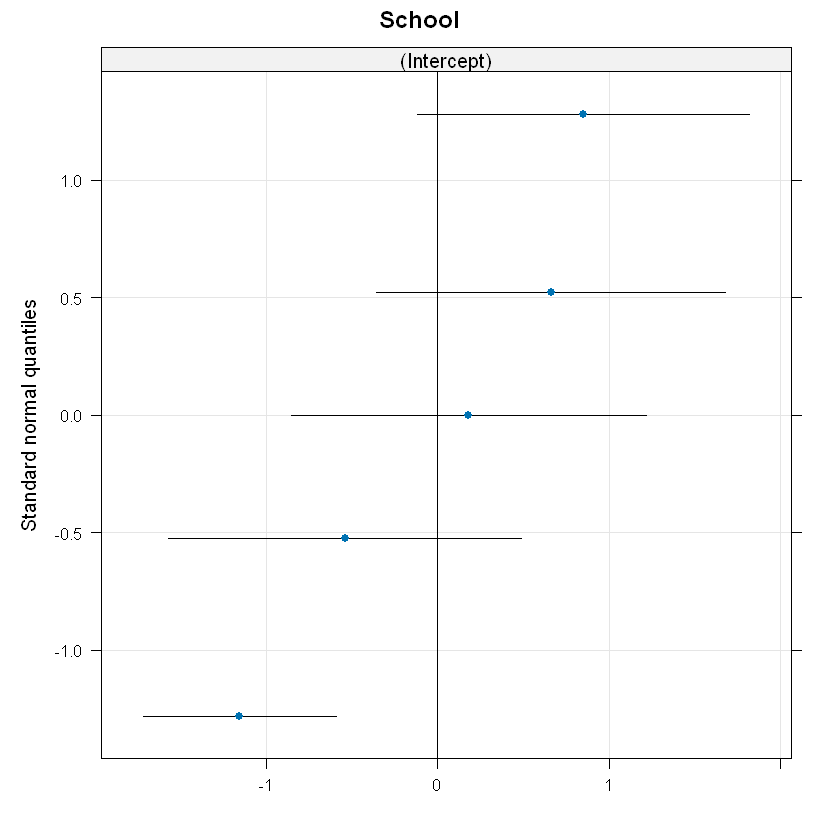

In [25]:
qqmath(ranef(mnulo, condVar = TRUE))

Now, we plot model 3

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


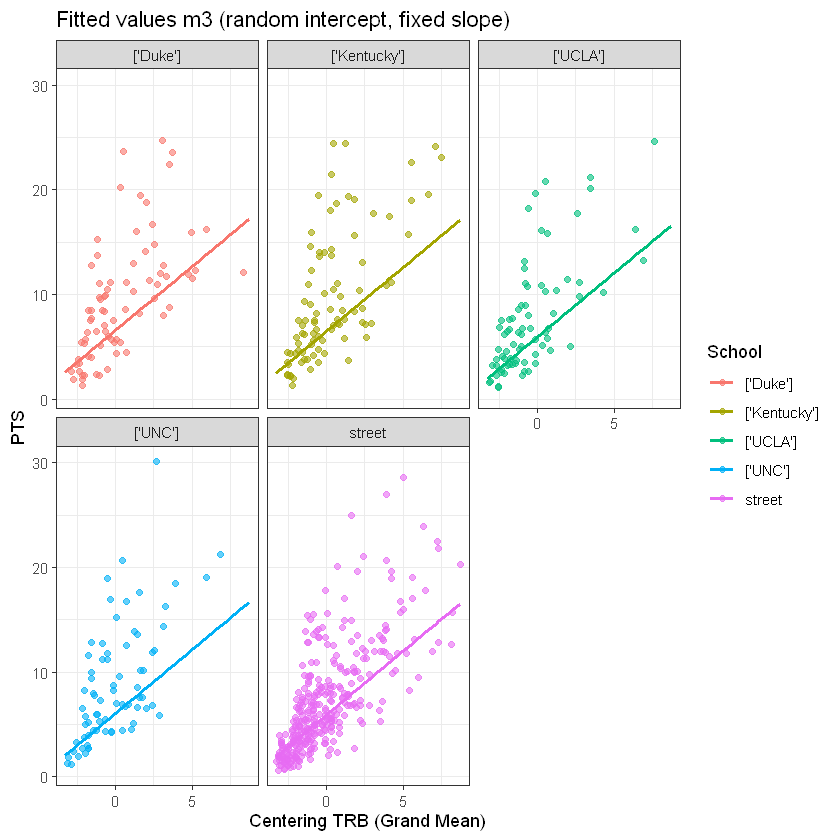

In [26]:
ranefs_m3 <- ranef(m3)$School
ranefs_m3$School <- rownames(ranefs_m3)
colnames(ranefs_m3) <- c("intercept_ranef", "School")

fixefs_m3 <- fixef(m3)
intercept_fixed <- fixefs_m3["(Intercept)"]
slope_fixed <- fixefs_m3["TRB_cgm"]


TRB_seq <- seq(from = min(nba_top5_schools$TRB_cgm, na.rm = TRUE),
               to = max(nba_top5_schools$TRB_cgm, na.rm = TRUE),
               length.out = 100)

line_data_m3 <- expand.grid(
  TRB_cgm = TRB_seq,
  School = unique(nba_top5_schools$School)
)

line_data_m3 <- left_join(line_data_m3, ranefs_m3, by = "School")

line_data_m3 <- line_data_m3 %>%
  mutate(
    intercept_total = intercept_fixed + intercept_ranef,
    # Pendiente fija, igual para todas las escuelas
    slope_total = slope_fixed,
    PTS_pred = intercept_total + slope_total * TRB_cgm
  )

ggplot(nba_top5_schools, aes(x = TRB_cgm, y = PTS, color = School)) +
  geom_point(alpha = 0.6) +
  geom_line(data = line_data_m3, aes(x = TRB_cgm, y = PTS_pred, color = School), size = 1) +
  facet_wrap(~ School) +
  labs(
    title = "Fitted values m3 (random intercept, fixed slope)",
    x = "Centering TRB (Grand Mean)",
    y = "PTS",
    color = "School"
  ) +
  theme_bw()

modelo 4 plot

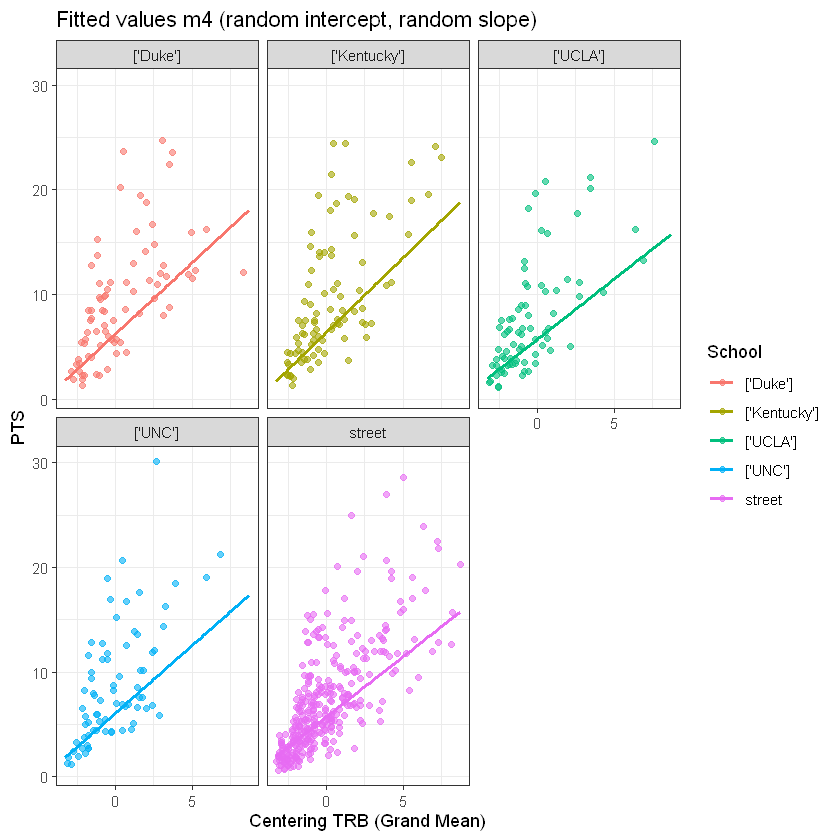

In [27]:
nba_top5_schools$PTS_pred <- predict(m4, re.form = NULL)
ranefs <- ranef(m4)$School
ranefs$School <- rownames(ranefs)
colnames(ranefs) <- c("intercept_ranef", "TRB_cgm_ranef", "School")


fixefs <- fixef(m4)
intercept_fixed <- fixefs["(Intercept)"]
slope_fixed <- fixefs["TRB_cgm"]


# Crear un grid de valores centrados de TRB
TRB_seq <- seq(from = min(nba_top5_schools$TRB_cgm, na.rm = TRUE),
               to = max(nba_top5_schools$TRB_cgm, na.rm = TRUE),
               length.out = 100)

# Expandir para cada escuela
line_data <- expand.grid(
  TRB_cgm = TRB_seq,
  School = unique(nba_top5_schools$School)
)

# Juntar con efectos aleatorios
line_data <- left_join(line_data, ranefs, by = "School")


# Calcular pendiente e intercepto total por escuela
line_data <- line_data %>%
  mutate(
    intercept_total = intercept_fixed + intercept_ranef,
    slope_total = slope_fixed + TRB_cgm_ranef,
    PTS_pred = intercept_total + slope_total * TRB_cgm
  )



In [ ]:
ggplot(nba_top5_schools, aes(x = TRB_cgm, y = PTS, color = School)) +
  geom_point(alpha = 0.6) +
  geom_line(data = line_data, aes(x = TRB_cgm, y = PTS_pred, color = School), size = 1) +
  facet_wrap(~ School) +
  labs(
    title = "Fitted values m4 (random intercept, random slope)",
    x = "Centering TRB (Grand Mean)",
    y = "PTS",
    color = "School"
  ) +
  theme_bw()

Lastly, we obtain the intercepts and slopes of each model.

In [28]:
# Para m3 (solo intercepto aleatorio)
ranefs_m3 <- ranef(m3)$School %>% 
  as.data.frame() %>% 
  rename(intercept_ranef = `(Intercept)`) %>% 
  mutate(School = rownames(ranef(m3)$School)) %>% 
  select(School, intercept_ranef)

fixefs_m3 <- fixef(m3)
intercept_fixed_m3 <- fixefs_m3["(Intercept)"]
slope_fixed_m3 <- fixefs_m3["TRB_cgm"]

ranefs_m3 <- ranefs_m3 %>%
  mutate(
    intercept_total = intercept_fixed_m3 + intercept_ranef,
    slope_fixed = slope_fixed_m3
  )

print("Interceptos y pendiente fija por escuela modelo m3:")
print(ranefs_m3)


[1] "Interceptos y pendiente fija por escuela modelo m3:"
                   School intercept_ranef intercept_total slope_fixed
['Duke']         ['Duke']       0.3887929        6.571692    1.214626
['Kentucky'] ['Kentucky']       0.2956101        6.478509    1.214626
['UCLA']         ['UCLA']      -0.2487106        5.934188    1.214626
['UNC']           ['UNC']      -0.1491237        6.033775    1.214626
street             street      -0.2865687        5.896330    1.214626


In [29]:
ranefs_m4 <- ranef(m4)$School %>% 
  as.data.frame() %>% 
  rename(
    intercept_ranef = `(Intercept)`,
    slope_ranef = TRB_cgm
  ) %>% 
  mutate(School = rownames(ranef(m4)$School)) %>% 
  select(School, intercept_ranef, slope_ranef)

fixefs_m4 <- fixef(m4)
intercept_fixed_m4 <- fixefs_m4["(Intercept)"]
slope_fixed_m4 <- fixefs_m4["TRB_cgm"]

ranefs_m4 <- ranefs_m4 %>%
  mutate(
    intercept_total = intercept_fixed_m4 + intercept_ranef,
    slope_total = slope_fixed_m4 + slope_ranef
  )

print("Interceptos y pendientes (random slopes) por escuela modelo m4:")
print(ranefs_m4)

[1] "Interceptos y pendientes (random slopes) por escuela modelo m4:"
                   School intercept_ranef slope_ranef intercept_total
['Duke']         ['Duke']      0.20502265  0.08390691        6.219163
['Kentucky'] ['Kentucky']      0.36036822  0.14748314        6.374508
['UCLA']         ['UCLA']     -0.30355740 -0.12423293        5.710583
['UNC']           ['UNC']      0.04368036  0.01787648        6.057820
street             street     -0.30551383 -0.12503361        5.708626
             slope_total
['Duke']        1.355096
['Kentucky']    1.418672
['UCLA']        1.146956
['UNC']         1.289065
street          1.146155
